In [1]:
# Install dependencies on colab
!pip install -Uqq fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 963.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [2]:
# Connect to google drive to load images and save model
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [3]:
from fastai.vision.all import *

# 1. Data loading and augmentation

Create a DataBlock and DataLoaders using:
- Training and validation images collected in a2
- Use `set_seed()` to obtain reproducible results.
- Use `item_tfms` and/or `batch_tfms`. Set `min_scale` so that digits are still visible
- Use a batch size of 32

Show a training and a validation batch.
Show augmentations, i.e. `show_batch()` with `unique=True`.

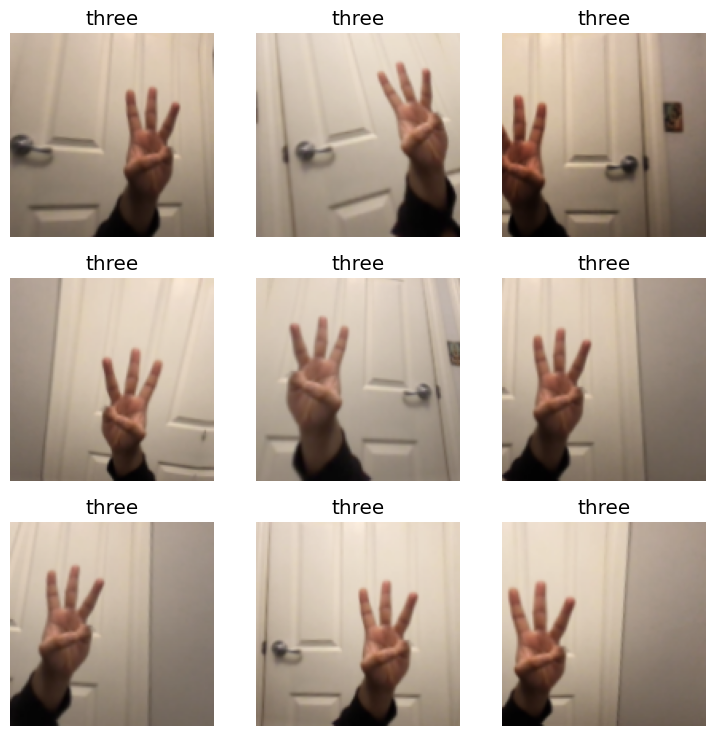

In [24]:
# random.seed(42)
# torch.manual_seed(42)

#Creating the path to the images
path = r"/content/gdrive/MyDrive/Google_Collab/digits"


#creating datablock
fingers = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128),
    batch_tfms=[*aug_transforms(size=128, min_scale=0.70)])

# Set seed for reproducibility
set_seed(42)

#dataloader
dls = fingers.dataloaders(path, bs=32)


# Show a training batch with augmentations
dls.train.show_batch(unique=True)

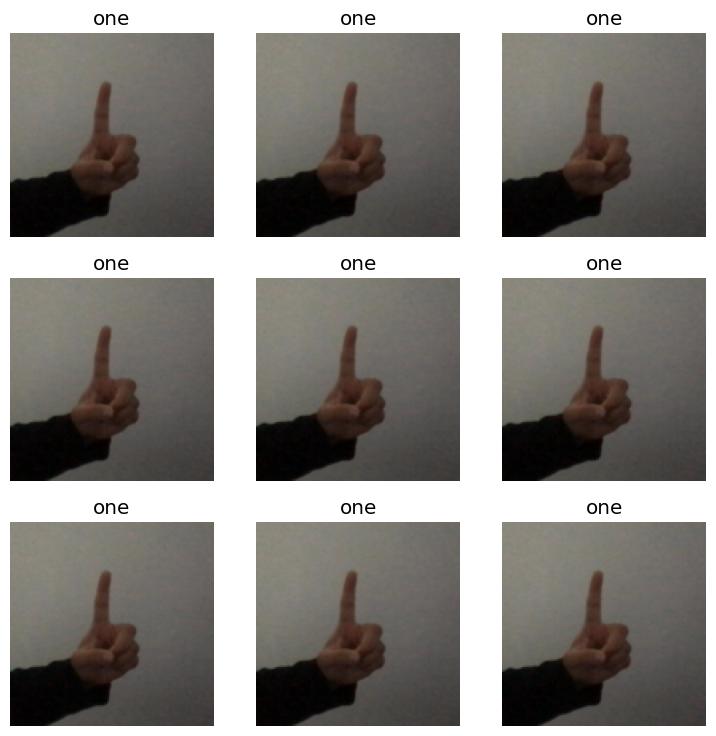

In [25]:


# Show a validation batch
dls.valid.show_batch(unique=True)

### Question 1: What type of item and batch transforms did you use? Can you spot any problems in the training set augmentations, e.g. finger digits missing?
*YOUR ANSWER HERE*


# 2. Train the classifier

## 2.1 Impact of learning rate
With:
- Same `set_seed()` as above
- Re-creating the same DataLoaders as above
- ResNet18 architecture.
- error rate as metric.

Use three learning rates:
- small: 3e-5
- medium: 3e-3
- large: 1e-1

Train the model with each learning rate using `fine_tune` with 10-15 epochs


In [1]:
# Create DataLoaders
path = r"/content/gdrive/MyDrive/Google_Collab/digits"
fingers = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    batch_tfms=[*aug_transforms(size=128, min_scale=0.90)])

dls = fingers.dataloaders(path, bs=32)

# Define ResNet18 architecture
arch = resnet18

# Define learning rates
learning_rates = [3e-5, 3e-3, 1e-1]
epochs = [15]

# Initialize dictionary to store error rates for each learning rate
error_rates = {lr: [] for lr in learning_rates}

# Train the model with each learning rate
for lr in learning_rates:
    # Create the learner
    learn = cnn_learner(dls, arch, metrics=error_rate)

    # Fine-tune the model

    for ep in epochs:
      learn.fine_tune(ep, base_lr=lr)

      # Get error rate and append to dictionary
      error_rates[lr].append(learn.recorder.final_record[2])

# Plot error rates for each learning rate
for lr, rates in error_rates.items():
    plt.plot(epochs, rates, label=f'Learning Rate: {lr}')

plt.xlabel('Number of Epochs')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Number of Epochs for Different Learning Rates')
plt.legend()
plt.show()

NameError: name 'DataBlock' is not defined

### Question 2: Which training run resulted in the best model? State number of epochs and final error rate values for all learning rates and identify the best model.
*YOUR ANSWER HERE*


### Question 3: Did any models overfit? Include your reasoning.
*YOUR ANSWER HERE*


# 3. Analyze model performance
- Retrain the best model from above.
- Plot the confusion matrix.
- Plot 10 top losses

In [36]:

# Retrain the Best Model
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(epochs=10, base_lr=3e-3)




epoch,train_loss,valid_loss,error_rate,time
0,2.049872,1.023658,0.400000,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.686544,0.335190,0.060000,00:04
1,0.504274,0.352873,0.120000,00:05
2,0.391038,0.109987,0.020000,00:04
3,0.319553,0.018279,0.020000,00:04
4,0.255689,0.321683,0.040000,00:04
5,0.217257,0.004786,0.000000,00:04
6,0.184477,0.101450,0.020000,00:04
7,0.155820,0.128821,0.020000,00:04
8,0.136210,0.126043,0.020000,00:04
9,0.117057,0.126248,0.020000,00:04


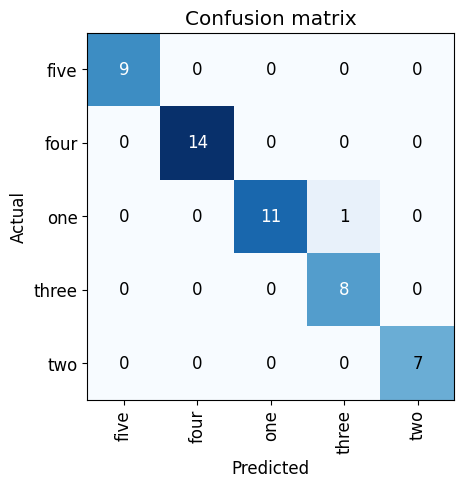

In [37]:
# Plot the Confusion Matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()



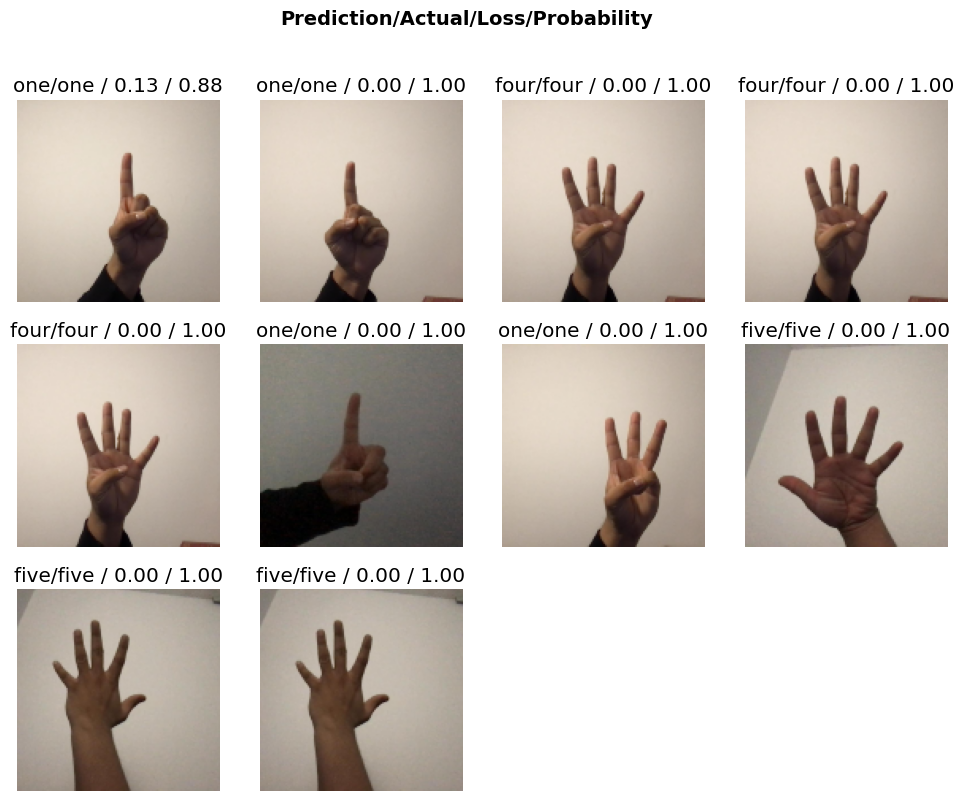

In [35]:
# Plot the Top 10 Losses
interp.plot_top_losses(10)

### Question 4: With which finger digits does your model have the most problems with?
*YOUR ANSWER HERE*


# 4. Save the best model to file
Save the model using `learn.export()` as `.pkl` file. Verify that the model can be reloaded and used to make predictions.

In [ ]:
# Save the trained model
learn.export('best_model.pkl')



In [ ]:
# Reload the model
learn = load_learner('best_model.pkl')

# Make predictions
preds, _ = learn.get_preds(dl=test_dl)

# 5. Summary and Conclusion

Summarize the best model:
- Training strategy: learning rate and epochs used.
- Error rate achieved, summary of confusion matrix, i.e. what kind of errors does the model make.

*YOUR ANSWER HERE*


Conclusion:
- Are you satisfied with model performance? Why, why not?

*YOUR ANSWER HERE*


# 6.Reflection
Include a sentence or two about
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating

while working on this assignment.

*YOUR ANSWER HERE*
